In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tomo_encoders.reconstruction.recon import recon_all, fbp_filter, rec_all
from tomo_encoders import DataFile
import dxchange
from tomo_encoders import viewer
import cupy as cp
from tomo_encoders.misc.voxel_processing import modified_autocontrast

spefile module not found
netCDF4 module not found
EdfFile module not found
astropy module not found
olefile module not found


In [2]:
from tomo_encoders.misc.viewer import add_scalebar

In [3]:
fpath = '/data/2022-03/Tekawade'
centers = { 'peektip8mm1x_093.h5': 1228, \
           'peektip8mm2x_094.h5' : 1218, \
            'peektip8mm2x0p2exp_095.h5': 1216}

In [4]:
def recon_and_show(fname, center, res, bar_len):
    full_path = os.path.join(fpath, fname)
    projs, flat, dark, theta = dxchange.read_aps_32id(full_path, sino = (1024,1024+1))
    flat = np.median(flat, axis = 0).astype(np.float32)
    dark = np.median(dark, axis = 0).astype(np.float32)
    projs = projs.astype(np.float32)
    ntheta, nz, n = projs.shape
    print(f"shape of projection array: {projs.shape}")
    print(f'shape of dark: {dark.shape} and flat: {flat.shape}')
    vol = recon_all(projs, theta, center, 1, dark, flat)
    h = modified_autocontrast(vol, s = 0.01)
    vol = np.clip(vol, *h)
    fig, ax = plt.subplots(1,1, figsize = (16,16))
    ax.imshow(vol[0,...], cmap = 'gray')    
    add_scalebar(ax, bar_len, res)
    return

shape of projection array: (1440, 1, 2448)
shape of dark: (1, 2448) and flat: (1, 2448)


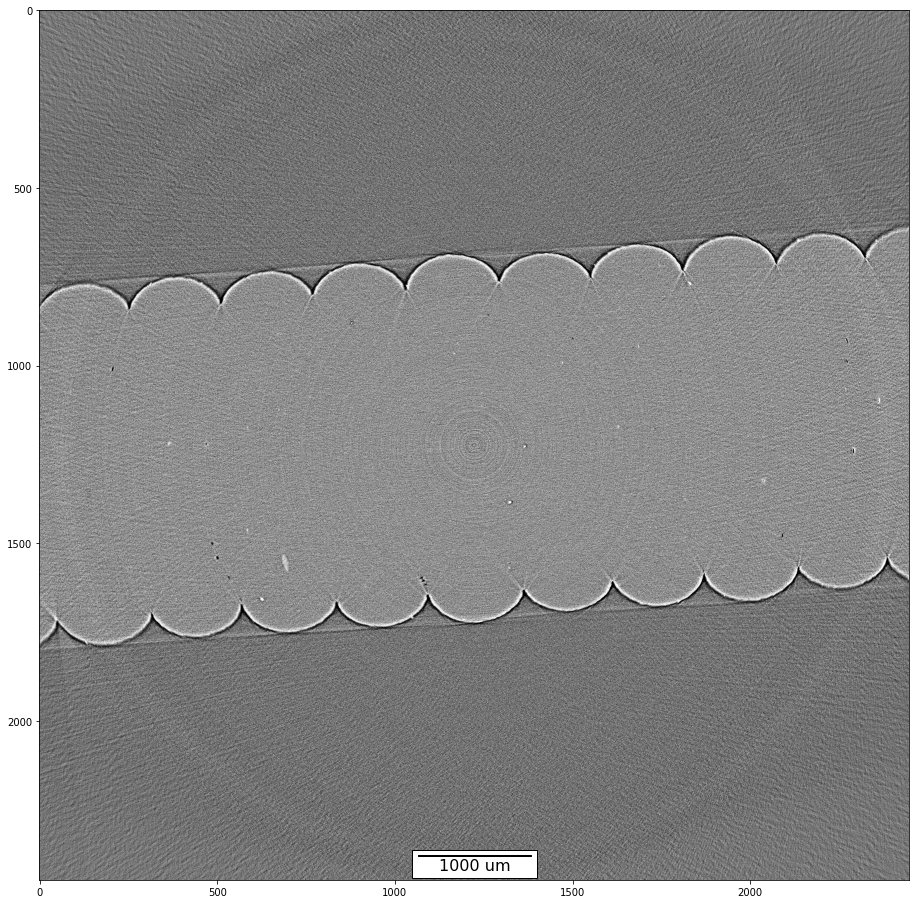

In [5]:
fname = 'peektip8mm1x_093.h5'
recon_and_show(fname, centers[fname], 3.13, 1000)

shape of projection array: (1440, 1, 2448)
shape of dark: (1, 2448) and flat: (1, 2448)


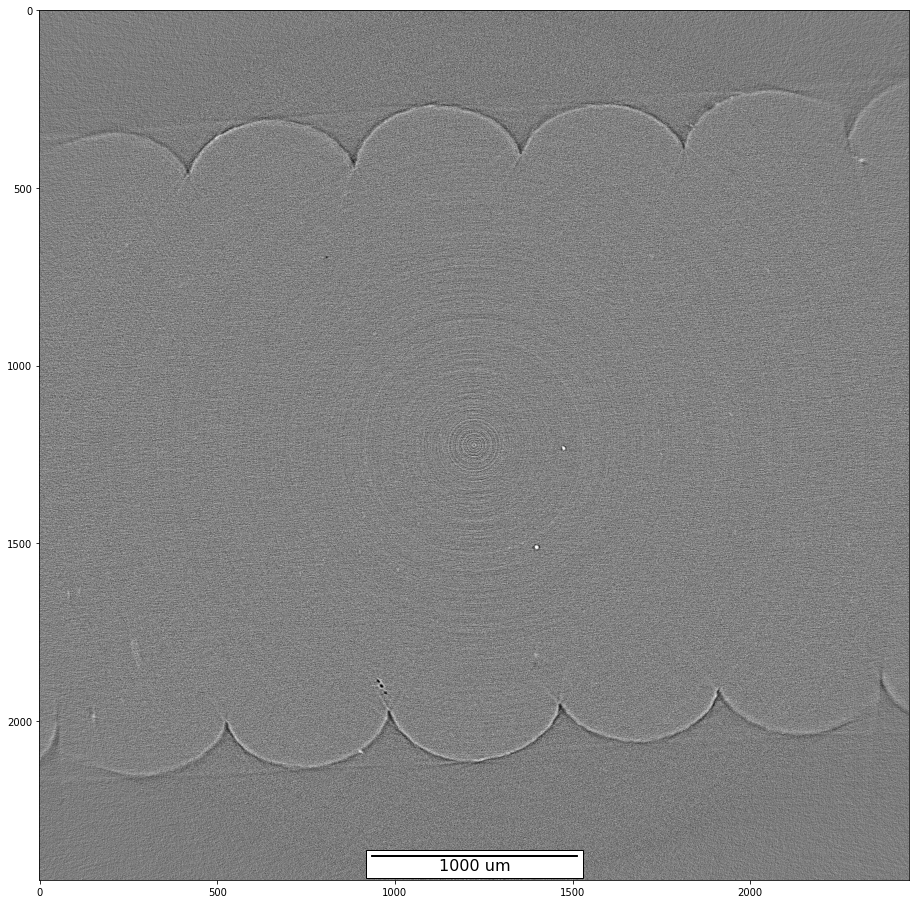

In [7]:
fname = 'peektip8mm2x_094.h5'
recon_and_show(fname, centers[fname], 1.725, 1000)

In [6]:
# fname = 'peektip8mm2x0p2exp_095.h5'
# center_guess = np.linspace(1210,1230,20)
# full_path = os.path.join(fpath, fname)
# projs, flat, dark, theta = dxchange.read_aps_32id(full_path, sino = (1024,1024+1))
# flat = np.median(flat, axis = 0).astype(np.float32)
# dark = np.median(dark, axis = 0).astype(np.float32)
# projs = projs.astype(np.float32)
# ntheta, nz, n = projs.shape
# print(f"shape of projection array: {projs.shape}")
# print(f'shape of dark: {dark.shape} and flat: {flat.shape}')


# for center in center_guess:
#     vol = recon_all(projs, theta, center, 1, dark, flat)
#     h = modified_autocontrast(vol, s = 0.01)
#     vol = np.clip(vol, *h)
#     fig, ax = plt.subplots(1,1, figsize = (8,8))
#     ax.imshow(vol[0], cmap = 'gray')    
#     ax.set_title(f"center = {center}")

##### 